<a href="https://colab.research.google.com/github/dhyannnn/2030-Assignments/blob/main/Exercise%2010%20-%20Covariance%20and%20sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Dhyan Thakkar__
<br>
Date: Feb. 2, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 10: Iterative sampling</font></center>

## <font color=#46769B>Introduction</font>

Normal distributions are one of the key tools for sampling.
With importance sampling, we can study a wide range of general multivariate distributions by sampling from normal distributions. But how do you know what parameters to use for the proposal distribution? Is there an optimal choice for the mean $\mu$ and standard deviation $\sigma$?

The answer is yes *BUT* you may not know what to choose ahead of time. You can figure it out iteratively.

For the case of a univariate distribution $P(x)$, the iterative process is:
- Try a guess for $\mu$ and $\sigma$ for your proposal distribution $Q(x)$.
- Using importance sampling, sample from $Q(x)$ and compute $\langle x \rangle$ and $\Delta x$ with respect to the target distribution $P$ (i.e., the weighted quantities).
- Repeat the process, taking $\langle x \rangle$ and $\Delta x$ as your new guesses for $\mu$ and $\sigma$, respectively.

You can repeat however many times you like until your guesses have converged. Then you can run one last time to get your final numbers.

During each test iteration, you need not have a large number of samples $N$. It may be computationally expensive to compute $P(x)$, so you want to save your resources until your final sampling run. 

The same idea applies in the multivariate case. Here, however, the covariance matrix can also give useful information to improve sampling.

Our goals for this notebook are:
- Practice sampling iteratively
- Practice using the covariance matrix to help in sampling.

Required reading:
- *Lesson 5: Multivariate distributions*



## <font color=#46769B>Part (a)</font>

Consider a target distribution of two variables $x$ and $y$:
$$P(x,y) = \left\{ \begin{array}{cc} A \, x^2 y \, e^{-f(x,y)} & {\rm for \; both} \; x \ge 0 \; {\rm and} \; y \ge 0 \\
0 & {\rm otherwise} \end{array} \right. $$
where $A = 16.04254$ is a normalizing constant and
$$f(x,y) = \frac{1}{2} \left(9 + x^2 - 4 x y + y^2 + x^2 y^2 \right) \, .$$ 
This PDF was purposely chosen to be complicated so that you would not have much intuition about what it looks like, except for the fact that it goes to zero as $x,y \to \infty$.

Consider a proposal distribution $Q(x,y) = \mathcal{N}_x(x) \mathcal{N}_y(y)$, where $\mathcal{N}_{x,y}$ are normal distributions with means $\mu_{x,y}$ and $\sigma_{x,y}$.

Perform the following steps:
- Start from an initial guess $\mu_x = \mu_y = \sigma_x = \sigma_y = 1$. 
- Run a `for` loop 10 times using the following syntax:
```py
for i in range(10):
      # Your code here
```
- Each iteration in your `for` loop, do the following:
    - Generate $N=10^4$ samples from $Q$.
    - Make a weighted 2D histogram corresponding to your target distribution. (Be sure in include `plt.show()` after your `plt.hist2d`. Also, use `density=True`.)
    - Calculate the weighted means $\langle x \rangle$, $\langle y\rangle$ and standard deviations $\Delta x$, $\Delta y$.
    - Make a new proposal distribution, where these values are your new guesses for $\mu_x$, $\mu_y$, $\sigma_x$, $\sigma_y$, respectively.
    - Repeat.
- After the `for` loop, make one final run with $N=10^6$ samples, using your final guesses for $\mu_x$, $\mu_y$, $\sigma_x$, $\sigma_y$. Plot the resulting histogram with a larger number of bins, `bins=[100,100]`.


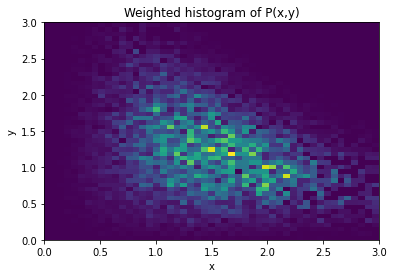

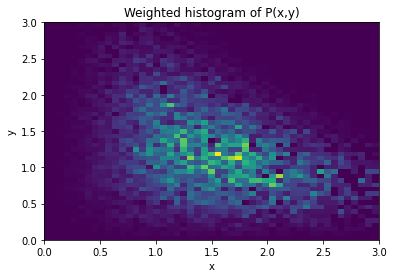

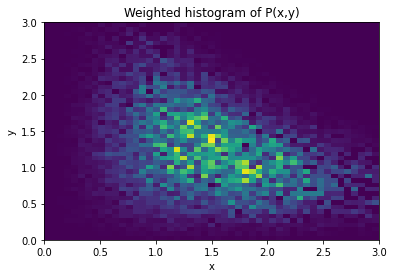

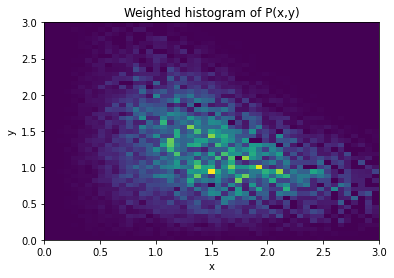

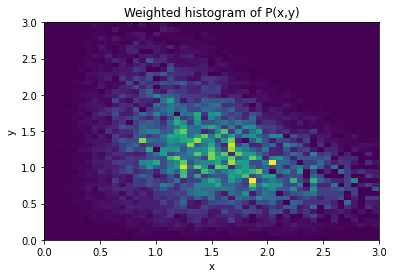

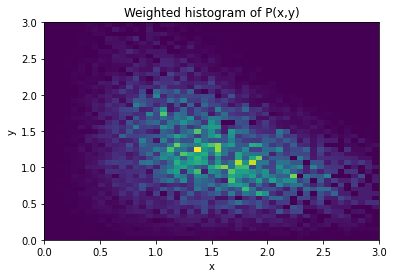

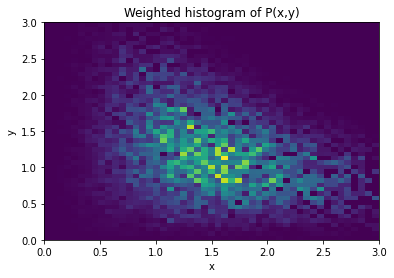

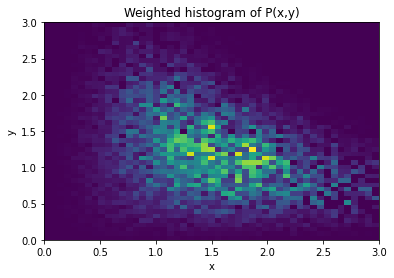

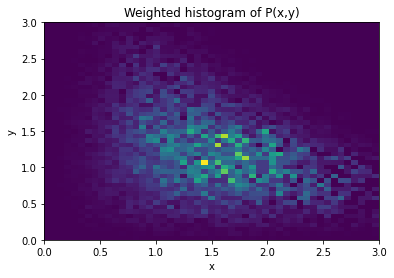

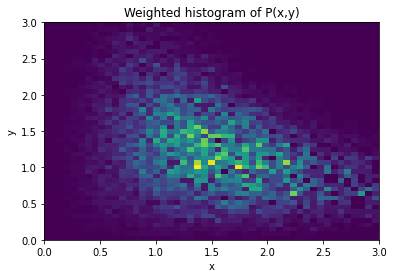



The list of means for x for each set of samples is [1.573985860629654, 1.5111786126477087, 1.5616721949238315, 1.565888070681853, 1.604848772873646, 1.6126045398014557, 1.5365949797773202, 1.5295611203580088, 1.5490057719525194, 1.5795191830509887]
The list of means for y for each set of samples is [1.2513715733374582, 1.189421744615483, 1.2564108185474772, 1.234089516906478, 1.247229391693185, 1.2516207321804798, 1.1949197127684372, 1.2015372135481723, 1.219242902396711, 1.2427532514798525]


The list of standard deviations for x for each set of samples is [0.539108023822327, 0.6289277893309547, 0.5677698286255113, 0.5759299149479199, 0.54801354344186, 0.5334863161211955, 0.6058002678055838, 0.6161737118442362, 0.5961206581464175, 0.5806942635104421]
The list of standard deviations for y for each set of samples is [0.5114139341799749, 0.5667291446512055, 0.5266563229910085, 0.5215909166183715, 0.5115490743076921, 0.4883161185480858, 0.5440231511522674, 0.5510144015793363, 0.53244086

In [4]:
import numpy as np
import matplotlib.pyplot as plt

A = 16.04254

def P(x,y):
    output = A * x**2 * y * np.exp(-0.5*(9 + x**2 - 4*x*y + y**2 + x**2 * y**2))
    return np.where( (x > 0) & (y > 0) , output, 0)

# Defining proposal distributions 
mu_x, sigma_x = 1, 1
mu_y, sigma_y = 1, 1
def Q_x(x):
  return 1/(np.sqrt(2*np.pi*sigma_x**2)) * (np.exp(-0.5*((x-mu_x)**2/sigma_x**2)))
def Q_y(y):
  return  1/(np.sqrt(2*np.pi*sigma_y**2)) * (np.exp(-0.5*((y-mu_y)**2/sigma_y**2)))

# Sampling x,y
num = 10**4
x_mean = []
y_mean = []
x_std = []
y_std = []
bins = [np.linspace(0,3), np.linspace(0,3)]
for i in range(10):
  x_samples = np.random.normal(mu_x,sigma_x,num)
  y_samples = np.random.normal(mu_y,sigma_y,num)
  target = P(x_samples,y_samples)
  proposal = Q_x(x_samples)*Q_y(y_samples)
  w = target/proposal
  x_mean.append( np.mean(w*x_samples))
  y_mean.append(np.mean(w*y_samples))
  x_std.append(np.sqrt( abs(np.mean(w*x_samples**2) - np.mean(w*x_samples)**2)))
  y_std.append(np.sqrt( abs(np.mean(w*y_samples**2) - np.mean(w*y_samples)**2)))
  plt.hist2d(x_samples,y_samples,bins=bins,weights=w)
  plt.title('Weighted histogram of P(x,y)')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

print('\n')
print('The list of means for x for each set of samples is', x_mean)
print('The list of means for y for each set of samples is', y_mean)
print('\n')
print('The list of standard deviations for x for each set of samples is', x_std)
print('The list of standard deviations for y for each set of samples is', y_std)

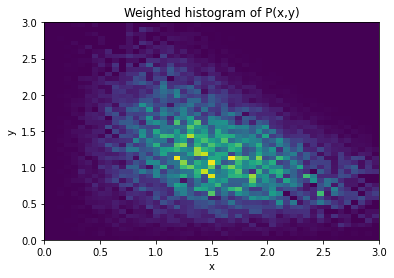

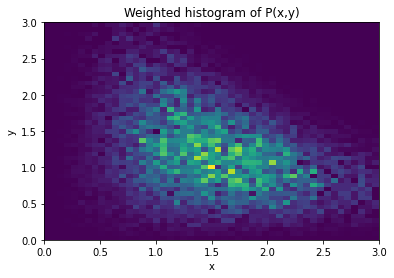

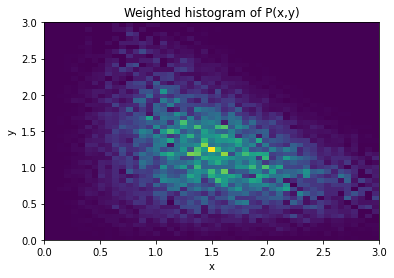

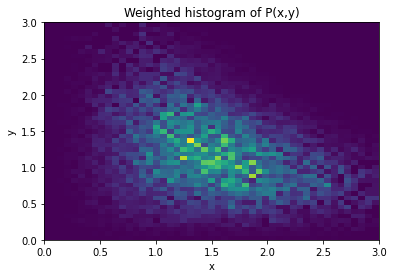

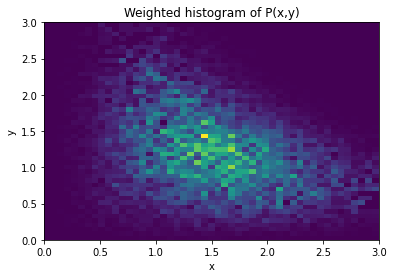

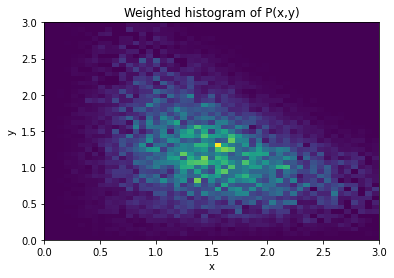

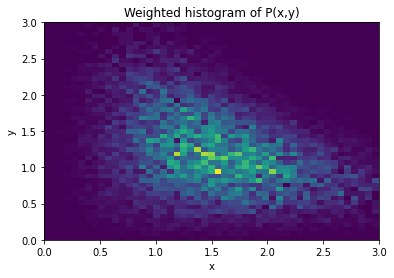

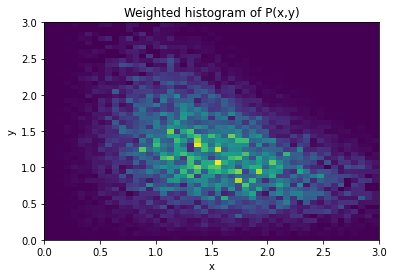

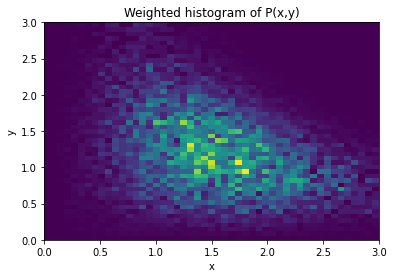

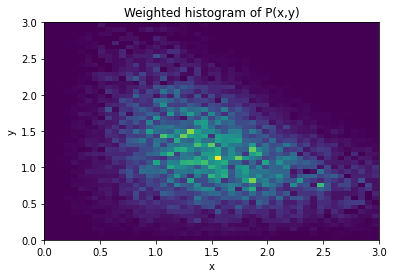



The list of means for x for each set of samples is [1.5395124784091017, 1.5535914146395071, 1.560399989290649, 1.555244528544502, 1.5338671493509128, 1.5613219905824256, 1.5980401756475775, 1.5562449168556225, 1.566271949555877, 1.5592937190130172]
The list of means for y for each set of samples is [1.2068421444456359, 1.2146629135419782, 1.2195466329275686, 1.2326372813460795, 1.2151386083261018, 1.2237279553122677, 1.2473468040477678, 1.2146888336633423, 1.2131721791954162, 1.2173763225359377]


The list of standard deviations for x for each set of samples is [0.6133052932556098, 0.5946603857121013, 0.5947608283337442, 0.5775989289205811, 0.6020389195686562, 0.5696717368606814, 0.5533146967634912, 0.5934548797355625, 0.5945072161584151, 0.6023112556988452]
The list of standard deviations for y for each set of samples is [0.5502819688897088, 0.5426281300945061, 0.5341276177624653, 0.530987622765845, 0.547812860577234, 0.5198745927727871, 0.5076384350768172, 0.5372284542078198, 0.537

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 

# Defining new proposal distributions
mu_x2, sigma_x2 = 1.5, 0.80
mu_y2, sigma_y2 = 1.2,0.80
def Q_x2(x):
  return 1/(np.sqrt(2*np.pi*sigma_x2**2)) * (np.exp(-0.5*((x-mu_x2)**2/sigma_x2**2)))
def Q_y2(y):
  return  1/(np.sqrt(2*np.pi*sigma_y2**2)) * (np.exp(-0.5*((y-mu_y2)**2/sigma_y2**2)))
# Sampling x,y
num = 10**4
x_mean2 = []
y_mean2 = []
x_std2 = []
y_std2 = []
bins = [np.linspace(0,3), np.linspace(0,3)]

for i in range(10):
  x_samples2 = np.random.normal(mu_x2,sigma_x2,num)
  y_samples2 = np.random.normal(mu_y2,sigma_y2,num)
  target2 = P(x_samples2,y_samples2)
  proposal2 = Q_x2(x_samples2)*Q_y2(y_samples2)
  w2 = target2/proposal2
  x_mean2.append( np.mean(w2*x_samples2))
  y_mean2.append(np.mean(w2*y_samples2))
  x_std2.append(np.sqrt( abs(np.mean(w2*x_samples2**2) - np.mean(w2*x_samples2)**2)))
  y_std2.append(np.sqrt( abs(np.mean(w2*y_samples2**2) - np.mean(w2*y_samples2)**2)))
  plt.hist2d(x_samples2,y_samples2,bins=bins,weights=w2)
  plt.title('Weighted histogram of P(x,y)')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

print('\n')
print('The list of means for x for each set of samples is', x_mean2)
print('The list of means for y for each set of samples is', y_mean2)
print('\n')
print('The list of standard deviations for x for each set of samples is', x_std2)
print('The list of standard deviations for y for each set of samples is', y_std2)

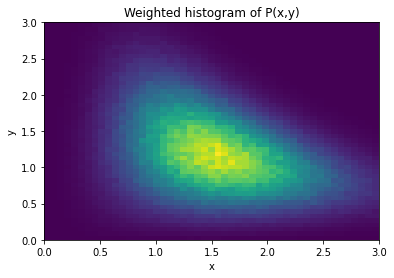

The mean for x is 1.5568101498975058
The mean for y is 1.2186057734305722


The standard deviation for x is 0.5938529807997677
The standard deviation for y is 0.5368641585634042


In [183]:
import numpy as np 
import matplotlib.pyplot as plt 
# Defining final proposal functions 
mu_x3, sigma_x3 = 1.6, 0.95
mu_y3, sigma_y3 = 1.2, 0.95
def Q_x3(x):
  return 1/(np.sqrt(2*np.pi*sigma_x3**2)) * (np.exp(-0.5*((x-mu_x3)**2/sigma_x3**2)))
def Q_y3(y):
  return  1/(np.sqrt(2*np.pi*sigma_y3**2)) * (np.exp(-0.5*((y-mu_y3)**2/sigma_y3**2)))
# Sampling 
num2 = 10**6
x_samples3 = np.random.normal(mu_x3,sigma_x3,num2)
y_samples3 = np.random.normal(mu_y3,sigma_y3,num2)

# Finding Weights 
target3 = P(x_samples3,y_samples3)
proposal3 = Q_x3(x_samples3)*Q_y3(y_samples3)
w3 = target3/proposal3
# Finding means and standard deviations 
x_mean3 = np.mean(w3*x_samples3)
y_mean3 = np.mean(w3*y_samples3)
x_std3 = np.sqrt( abs(np.mean(w3*x_samples3**2) - np.mean(w3*x_samples3)**2))
y_std3 = np.sqrt( abs(np.mean(w3*y_samples3**2) - np.mean(w3*y_samples3)**2))
plt.hist2d(x_samples3,y_samples3,bins=bins,weights=w3)
plt.title('Weighted histogram of P(x,y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('The mean for x is', x_mean3 )
print('The mean for y is', y_mean3 )
print('\n')
print('The standard deviation for x is', x_std3 )
print('The standard deviation for y is', y_std3 )

## <font color=#46769B>Part (b)</font>

Repeat Part (a) with the following modifications:
- Take $Q(x,y)$ to be a multivariate normal distribution that you will sample from using `numpy.random.multivariate_normal(mu,C,num)` where `mu` represents a vector $\vec{\mu} = (\mu_x,\mu_y)$ and `C` is the covariance matrix.
- For your initial run, take $\vec{\mu} = (1,1)$ and $C = \left(\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array} \right)$.
So, you will sample using the following code:
```py
mu = [1,1]
C = [[1,0],[0,1]]
r_samples = np.random.multivariate_normal(mu,C,num)
x_samples = r_samples[:,0]
y_samples = r_samples[:,1]
```
- Proceed with the same ten iterations, using a `for` loop, each with $N=10^4$. For each iteration, you will compute:
    - The weighted means $\langle x \rangle$, $\langle y \rangle$, which you will use as your next guess for $\vec{\mu}$.
    - The weighted covariance matrix $C$ from your samples, which you will use as the next input for $C$ when you sample.
    - Weighted histogram, as in Part (a)
- After the `for` loop, make one final run with $N=10^6$ samples, using your final guesses for $\vec{\mu}$ and $C$. Make your final histogram as in Part (a).

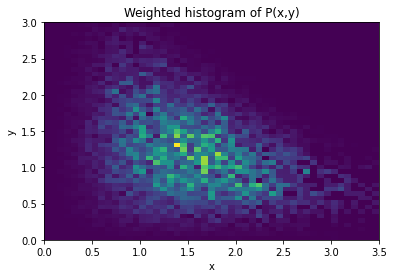

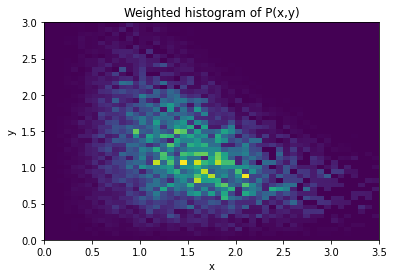

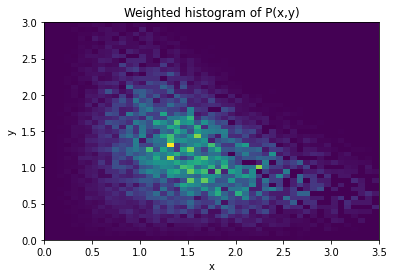

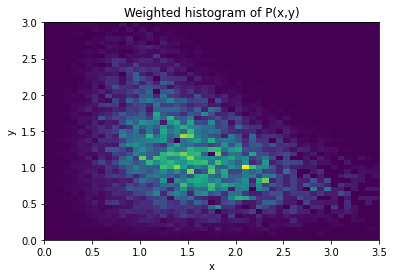

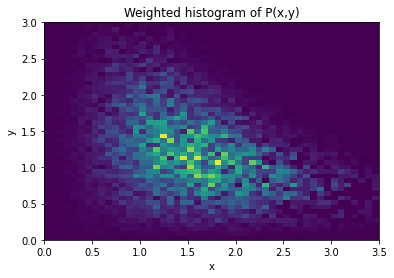

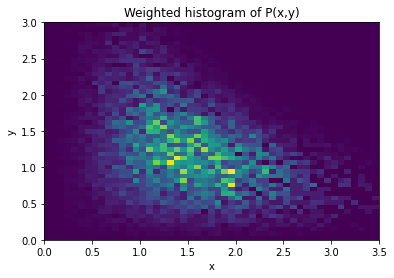

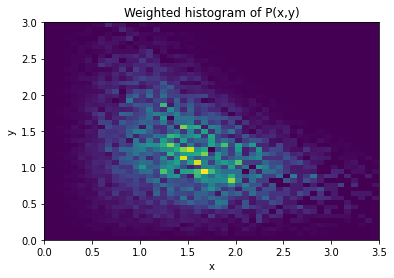

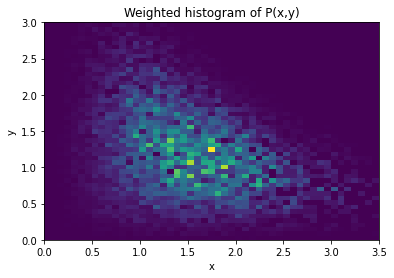

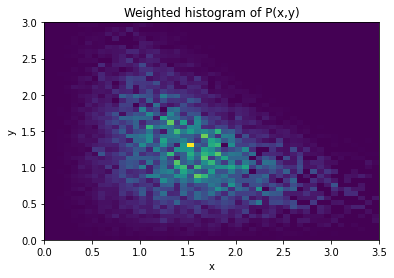

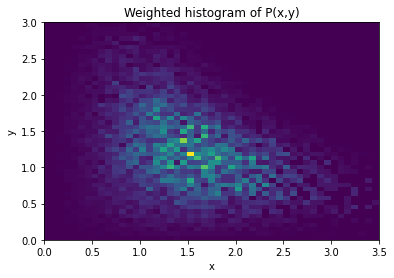

The mean for x is [3.8839622954525868, 3.9355374051546583, 3.8575155296762285, 3.974364747535071, 3.9767390446904924, 4.0103549587269915, 3.856722831421732, 3.798757833239735, 3.8284185072354506, 3.853411256694884]
The mean for y is [3.031905018748779, 3.0349886840715543, 2.982410493901145, 3.0616503766612713, 3.0730674506079225, 3.171826042149352, 3.045545304046123, 2.9923197143366917, 3.0006834024450533, 3.0545617353391346]


Covariance matrix is
 [[32.90489988 24.45365361]
 [24.45365361 18.17301304]]


In [46]:
import numpy as np 
import matplotlib.pyplot as plt 

mu4 = [1,1]
C = [[1,0],[0,1]]
x_mean4 = []
y_mean4 = []
Cinv = np.linalg.inv(C)
detC = np.linalg.det(C)
num = 10**4

bins2 = [np.linspace(0,3.5), np.linspace(0,3)]
for j in range(10):
  def Q(x,y):
    r = np.array([x,y]) - np.array(mu4)
    prefactor = 1/(2*np.pi)**(3/2) * 1/np.sqrt(detC)
    return prefactor * np.exp( - 0.5*r @ Cinv @ r)
  
  # Sampling x and y 
  r_samples = np.random.multivariate_normal(mu4,C,num)
  x_samples4 = r_samples[:,0]
  y_samples4 = r_samples[:,1]
  
  # Finding weights for each sample 
  w4 = np.zeros(num)
  
  # Populate with a for loop
  for i in range(num):
    x = x_samples4[i]
    y = y_samples4[i]
    w4[i] = P(x,y)/Q(x,y)
  x_mean4.append( np.mean(w4*x_samples4))
  y_mean4.append(np.mean(w4*y_samples4))
  def cov_matrix2(x,y,weights = None):
    if weights is not None:
      C_xx = np.mean(weights*(x[j]-x_mean4[j])**2)
      C_yy = np.mean(weights*(y[j]-y_mean4[j])**2)
      C_xy = np.mean(weights*(x[j]-x_mean4[j])*(y[j]-y_mean4[j]))
      return np.array([[C_xx,C_xy],[C_xy,C_yy]])
  plt.hist2d(x_samples4,y_samples4,bins=bins2,weights=w4)
  plt.title('Weighted histogram of P(x,y)')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()



print('The mean for x is', x_mean4 )
print('The mean for y is', y_mean4 )
print('\n')
print("Covariance matrix is\n", cov_matrix2(x_samples4,y_samples4,weights = w4))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: covariance is not positive-semidefinite.


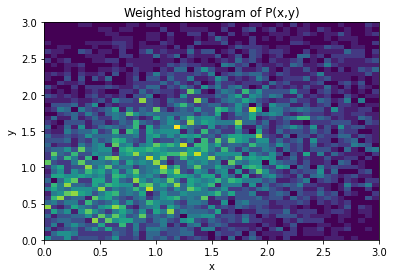

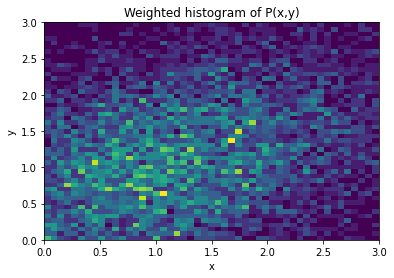

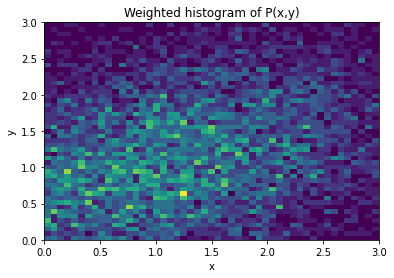

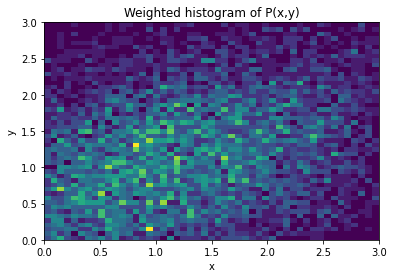

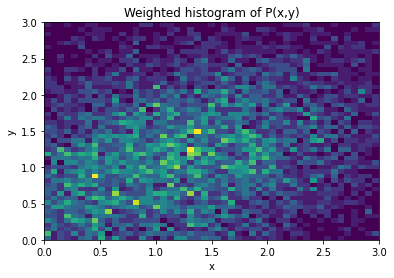

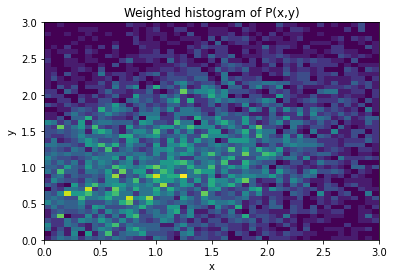

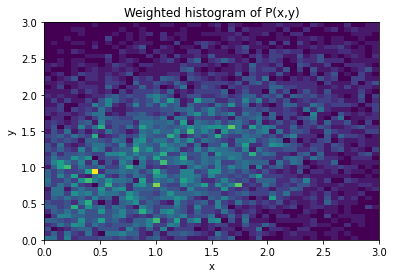

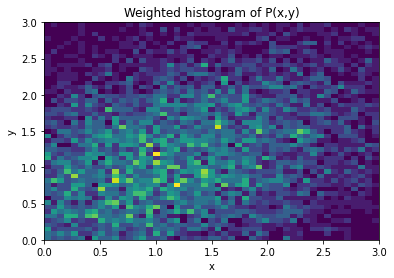

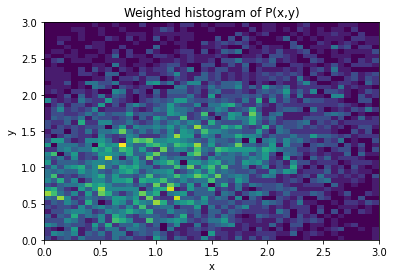

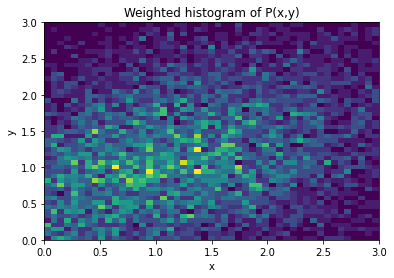

The mean for x is [0.010521264830047446, 0.010332759282817114, 0.010432916725129058, 0.01045034154779854, 0.010537789895202676, 0.01062994441245215, 0.010471130378068832, 0.010670863683683151, 0.01048215368751034, 0.010658773445123688]
The mean for y is [0.010505139845265589, 0.010433254251348159, 0.010432416869001676, 0.0104104432069546, 0.010382684775734851, 0.010500855452290885, 0.010574361398466996, 0.010573290483974429, 0.010511383960857736, 0.010724001291298886]


Covariance matrix is
 [[ 0.0013397  -0.00065344]
 [-0.00065344  0.00031871]]


In [54]:
mu5 = [1, 1]
C2 = [[1,1],[1,0]]
x_mean5 = []
y_mean5 = []
Cinv2 = np.linalg.inv(C2)
detC2 = np.linalg.det(C2)
num = 10**4

bins3 = [np.linspace(0,3), np.linspace(0,3)]
for j in range(10):
  def Q(x,y):
    r = np.array([x,y]) - np.array(mu5)
    prefactor = 1/(2*np.pi)**(3/2) * 1/np.sqrt(detC)
    return prefactor * np.exp( - 0.5*r @ Cinv @ r)
  
  # Sampling x and y 
  r_samples2 = np.random.multivariate_normal(mu5,C2,num)
  x_samples5 = r_samples2[:,0]
  y_samples5 = r_samples2[:,1]
  
  # Finding weights for each sample 
  w5 = np.zeros(num)
  
  # Populate with a for loop
  for i in range(num):
    x2 = x_samples5[i]
    y2 = y_samples5[i]
    w5[i] = P(x,y)/Q(x,y)
  x_mean5.append( np.mean(w5*x_samples5))
  y_mean5.append(np.mean(w5*y_samples5))
  def cov_matrix3(x2,y2,weights = None):
    if weights is not None:
      C_xx = np.mean(weights*(x2[j]-x_mean5[j])**2)
      C_yy = np.mean(weights*(y2[j]-y_mean5[j])**2)
      C_xy = np.mean(weights*(x2[j]-x_mean5[j])*(y2[j]-y_mean5[j]))
      return np.array([[C_xx,C_xy],[C_xy,C_yy]])
  plt.hist2d(x_samples5,y_samples5,bins=bins3,weights=w5)
  plt.title('Weighted histogram of P(x,y)')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()



print('The mean for x is', x_mean5 )
print('The mean for y is', y_mean5 )
print('\n')
print("Covariance matrix is\n", cov_matrix3(x_samples5,y_samples5,weights = w5))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: covariance is not positive-semidefinite.


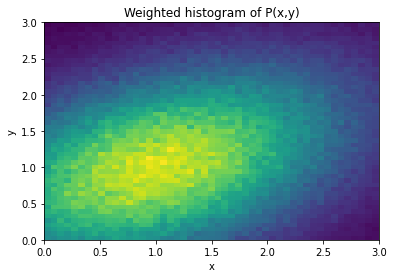

The mean for x is 0.010504240208320224
The mean for y is 0.010509651920724047


Covariance matrix is
 [[0.02438585 0.01498954]
 [0.01498954 0.0196894 ]]


In [55]:
import numpy as np 
import matplotlib.pyplot as plt 

mu6 = [1, 1]
C3 = [[1,1],[1,0]]

Cinv3 = np.linalg.inv(C3)
detC3 = np.linalg.det(C3)
num3 = 10**6

bins4 = [np.linspace(0,3), np.linspace(0,3)]

def Q(x,y):
  r = np.array([x,y]) - np.array(mu6)
  prefactor = 1/(2*np.pi)**(3/2) * 1/np.sqrt(detC)
  return prefactor * np.exp( - 0.5*r @ Cinv @ r)

# Sampling x and y 
r_samples3 = np.random.multivariate_normal(mu6,C2,num3)
x_samples6 = r_samples3[:,0]
y_samples6 = r_samples3[:,1]

# Finding weights for each sample 
w6 = np.zeros(num3)
  
# Populate with a for loop
for i in range(num3):
  x3 = x_samples6[i]
  y3 = y_samples6[i]
  w6[i] = P(x,y)/Q(x,y)

x_mean6 = ( np.mean(w6*x_samples6))
y_mean6 = (np.mean(w6*y_samples6))

def cov_matrix4(x3,y3,weights = None):
  if weights is not None:
    C_xx = np.mean(weights*(x3-x_mean6)**2)
    C_yy = np.mean(weights*(y3-y_mean6)**2)
    C_xy = np.mean(weights*(x3-x_mean6)*(y3-y_mean6))
    return np.array([[C_xx,C_xy],[C_xy,C_yy]])
plt.hist2d(x_samples6,y_samples6,bins=bins4,weights=w6)
plt.title('Weighted histogram of P(x,y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



print('The mean for x is', x_mean6 )
print('The mean for y is', y_mean6 )
print('\n')
print("Covariance matrix is\n", cov_matrix4(x_samples6,y_samples6,weights = w6))